In [17]:
import sys
sys.path.append(r'../src')
from data_loading import load_data


In [18]:
filepath = r"..\data\data_1.csv"
df = load_data(filepath)

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
print(df.shape)

(1143, 13)


In [22]:
print(df.isnull().sum())
print(df.dtypes)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


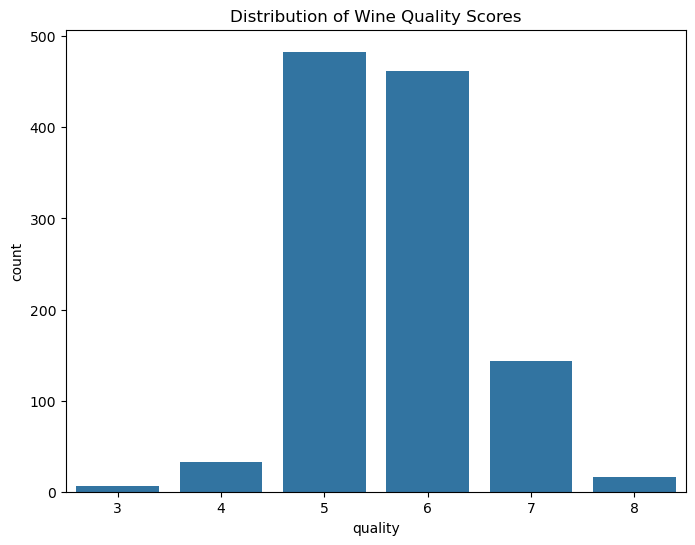

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Scores')
plt.show()

Vast majority of the data is skewed to quality = 5/6. This could be an issue.

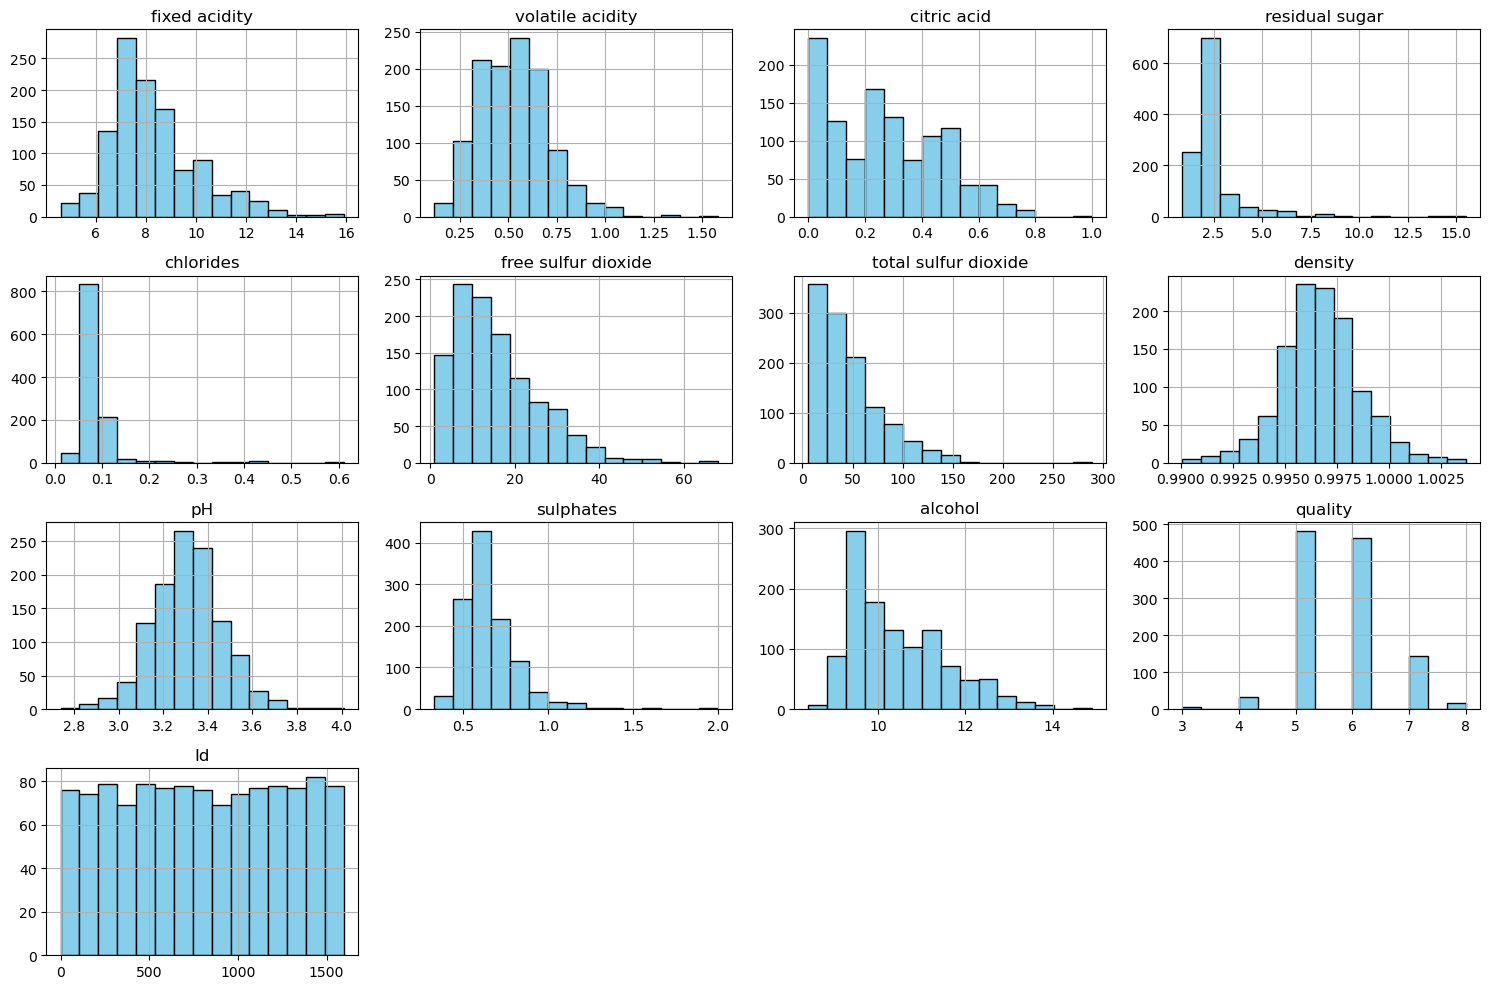

In [24]:
# Plot histograms for each numerical feature
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


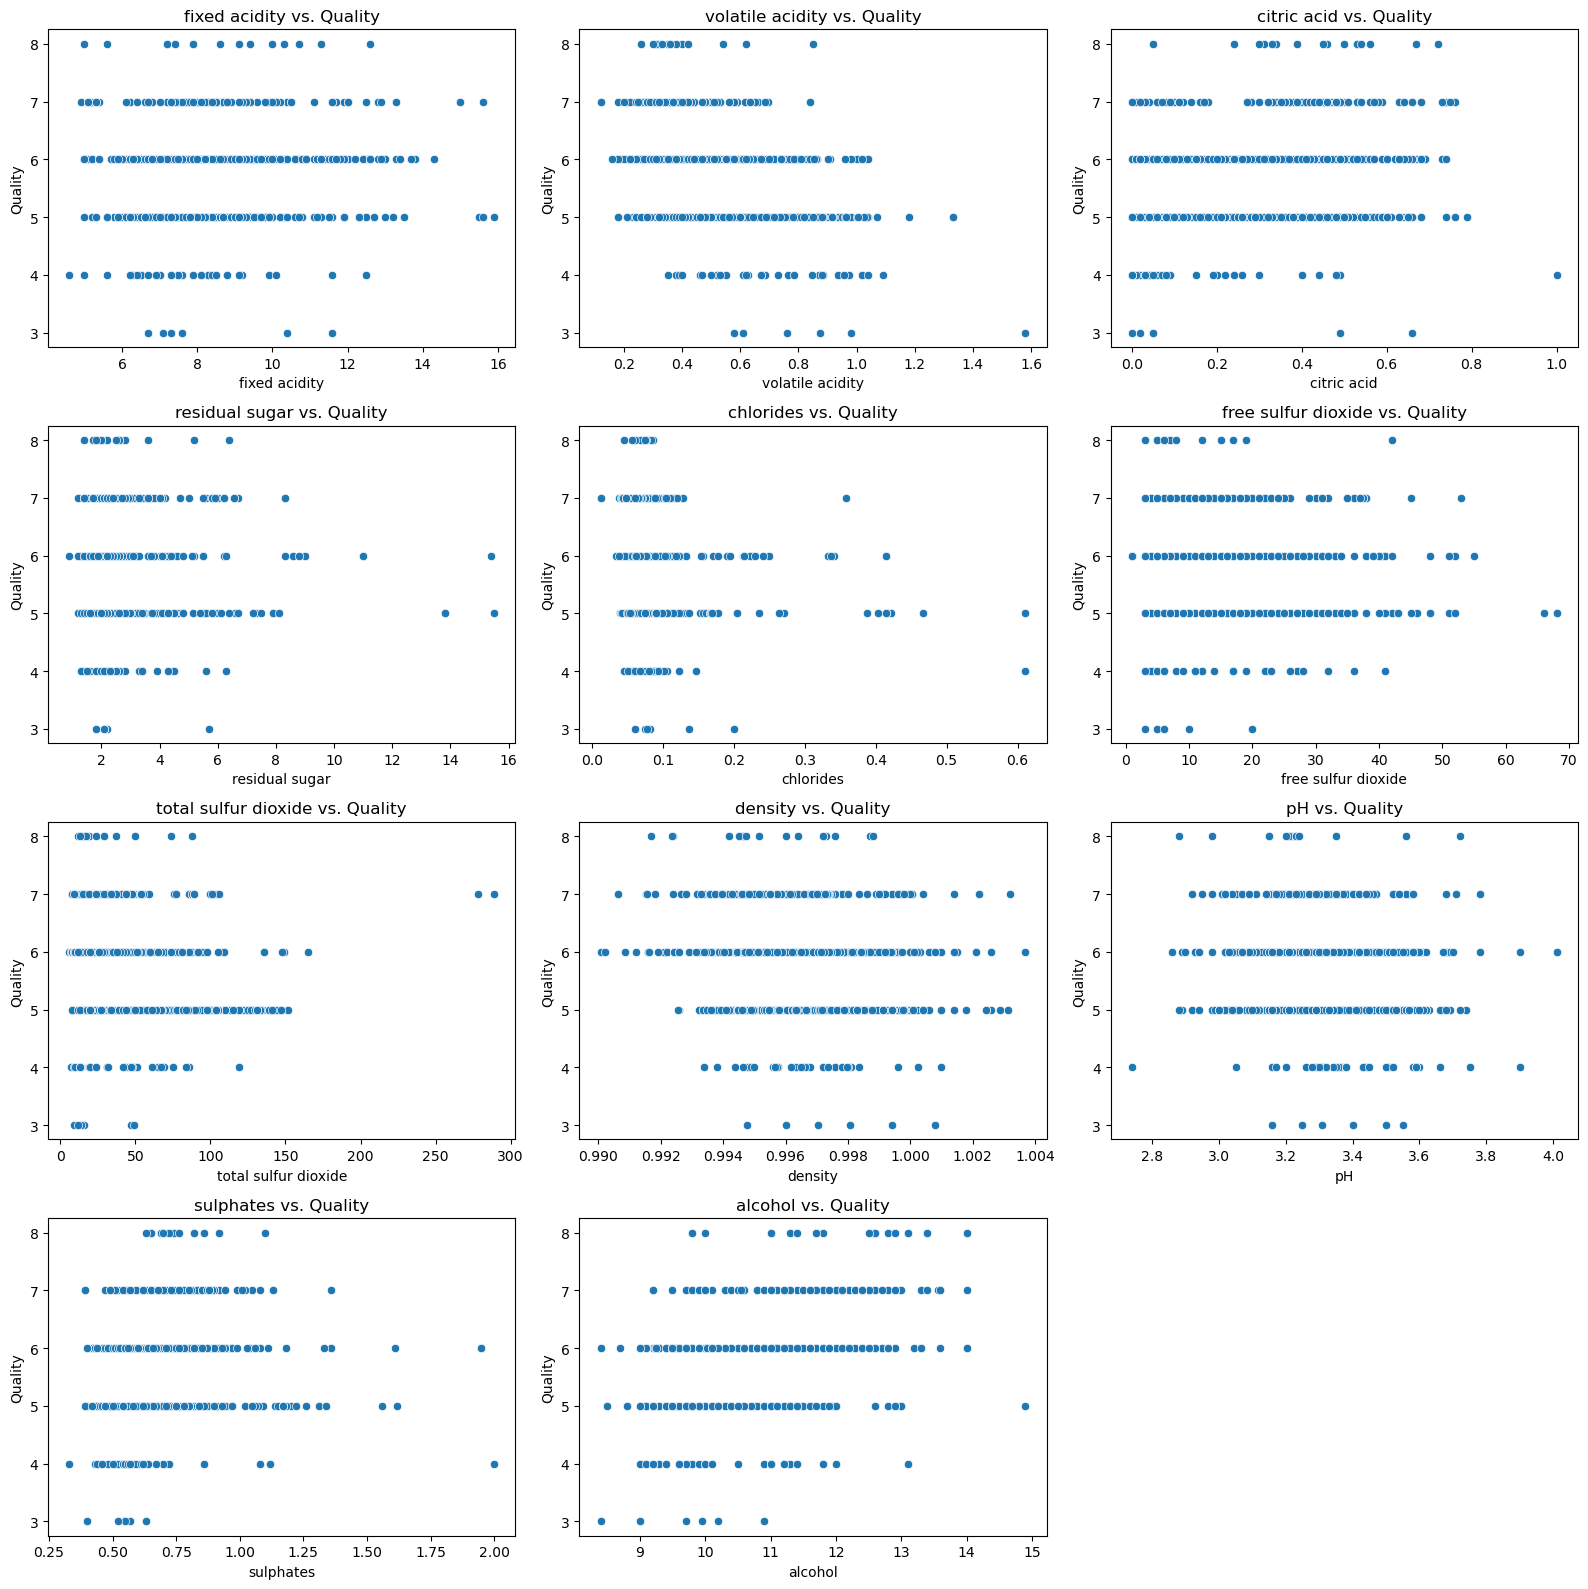

In [25]:
features = df.columns.drop(['quality', 'Id'])  # Exclude 'quality' and 'Id'

# Number of features to plot
num_features = len(features)

# Define the number of columns for the grid
n_cols = 3  # Adjust as needed for the layout

# Calculate the number of rows needed based on the number of features
n_rows = (num_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatterplots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='quality', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Quality')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Quality')

# Remove any empty subplots if they exist
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


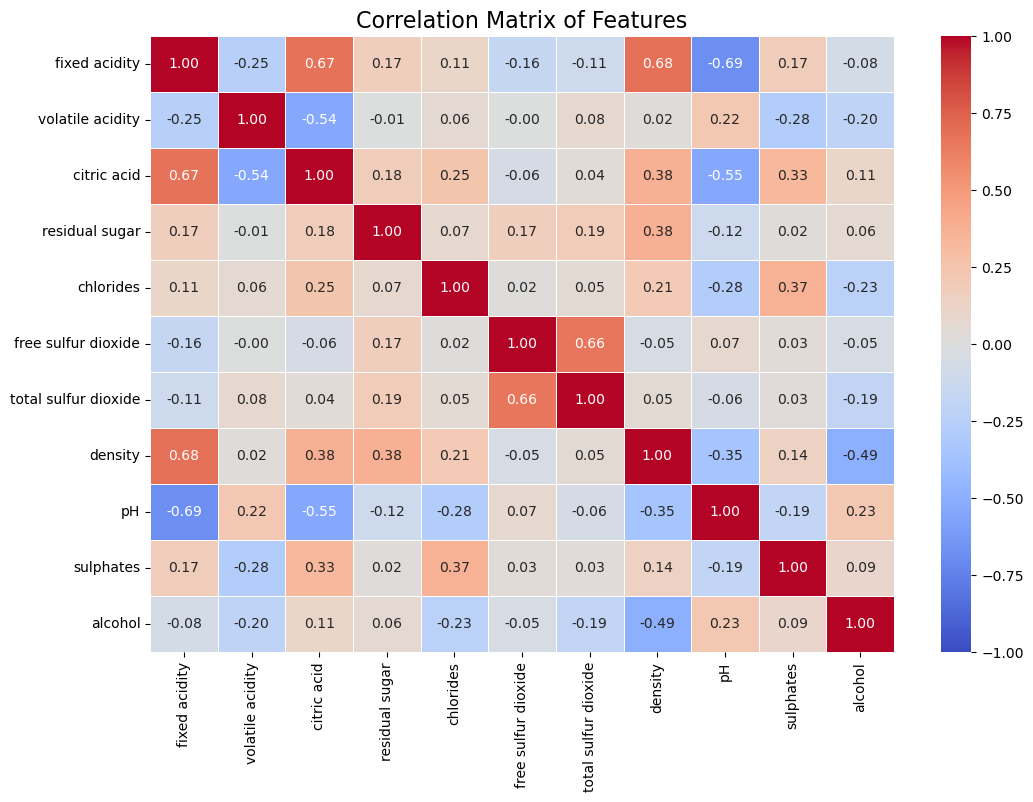

In [26]:
df_corr_mat = df
df_corr_mat = df_corr_mat.drop(columns=['Id', 'quality'])
corr_matrix = df_corr_mat.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features', fontsize=16)

plt.show()